In [64]:
import numpy as np
from queue import Queue
import cv2
import matplotlib.pyplot as plt

In [65]:
image_path = r'D:\College\pccoe\5th sem\CV\Practicals\Final_practicals\something-main\something-main\dog\Dog Segmentation\Images\dog.8790.jpg'  # Change this to the path of your image

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
bilateral = cv2.bilateralFilter(img, 5, 15, 15)

In [66]:
seed = (100, 50) 
threshold = 240

rows, cols = img.shape
output = np.zeros_like(img)
visited = np.zeros_like(img, dtype=bool)

neighbors = [(-1, -1), (-1, 0), (-1, 1),
                (0, -1),           (0, 1),
                (1, -1),  (1, 0),  (1, 1)]

stack = [seed]
seed_intensity = img[seed]

while stack:
    x, y = stack.pop()
    
    if visited[x, y]:
        continue
    
    visited[x, y] = True
    
    if abs(int(img[x, y]) - seed_intensity) < threshold:
        output[x, y] = 255
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and not visited[nx, ny]:
                stack.append((nx, ny))


C:\Users\Aryan\AppData\Local\Temp\ipykernel_11260\1059781645.py:23: RuntimeWarning: overflow encountered in scalar subtract
  if abs(int(img[x, y]) - seed_intensity) < threshold:


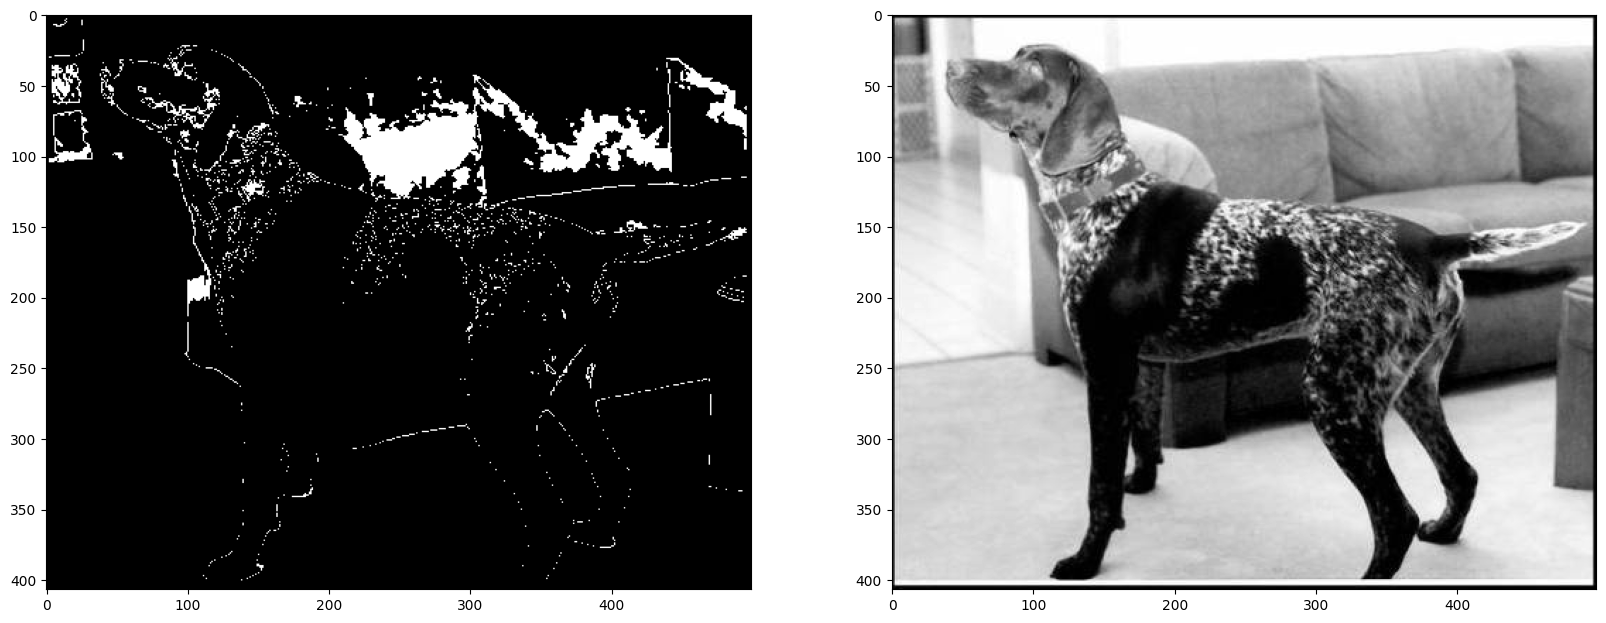

In [67]:
fig , axes = plt.subplots(1,2, figsize = (20, 10))

_, output = cv2.threshold(output, 120, 255, cv2.THRESH_BINARY_INV)
axes[0].imshow(output, cmap='gray')
axes[1].imshow(img, cmap='gray')

plt.show()
